#**Maestría en Inteligencia Artificial Aplicada**

##**Curso: Inteligencia Artificial y Aprendizaje Automático**

###Tecnológico de Monterrey

###Prof Luis Eduardo Falcón Morales

## **Adtividad de las Semanas 5 y 6**
###**Problema de asignación de créditos: South German Dataset.**

## **Nombre: Renzo Antonio Zagni Vestrini**
## **Matricula: A01795457**

# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [ ]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import os
from google.colab import drive

from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn import set_config





In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
drive.mount('/content/drive')
DIR = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(DIR)

Mounted at /content/drive


In [ ]:
# Cargamos los datos:

df = pd.read_csv("SouthGermanCredit.asc",sep=' ')
print(df.shape)
df.head(3)

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [ ]:
# Verificamos si hay datos faltantes
num_rows, num_cols = df.shape
df.isna().sum()/num_rows

laufkont    0.0
laufzeit    0.0
moral       0.0
verw        0.0
hoehe       0.0
sparkont    0.0
beszeit     0.0
rate        0.0
famges      0.0
buerge      0.0
wohnzeit    0.0
verm        0.0
alter       0.0
weitkred    0.0
wohn        0.0
bishkred    0.0
beruf       0.0
pers        0.0
telef       0.0
gastarb     0.0
kredit      0.0
dtype: float64

In [ ]:
df.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

In [ ]:
# Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************

df.columns = ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
              'employment_duration', 'installment_rate', 'personal_status_sex',
              'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans',
              'housing', 'number_credits', 'job', 'people_liable', 'telephone',
              'foreign_worker', 'credit_risk']

df.head().T
# *********** Aquí termina la sección de agregar código *************



,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


## **Ejercicio 2**

In [ ]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.

# ************* Inlcuye aquí tu código:*****************************
#
df['credit_risk'] = 1 - df['credit_risk']
print(df['credit_risk'].value_counts())
# *********** Aquí termina la sección de agregar código *************




0    700
1    300
Name: credit_risk, dtype: int64


## **Ejercicio 3**

In [ ]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************

# Separamos las variables predictoras y la variable de salida
X = df.loc[:, df.columns != 'credit_risk']
y = df.loc[:, df.columns == 'credit_risk']

# Separamos train y test 70/30
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3,  stratify=y, random_state=1)

# Separamos test en test y validacion 50/50
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5,stratify=ytest, random_state=1)

# *********** Aquí termina la sección de agregar código *************

# Mostremos las dimensiones de la partición generada:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(700, 20) (700, 1)
(150, 20) (150, 1)
(150, 20) (150, 1)


## **Ejercicio 4**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

    Todos los datos en el data frame son enteros de 64 bits.

### **Variables Categóricas:**

1.  **status**
    
    Descripción: Esta variable denota si la persona tiene cuenta de cheques
    en el banco y de ternerla, la cantidad. Se entiende que existe un saldo
    minimo mayor que cero.
    
    Tipo de variable: Ordinal

    Numero de niveles: 4 (1,2,3,4)

2.  **credit_history**

    Descripción: Esta variable representa un credit score y define si el cliente
    a faltado a sus pagos o ha pagado a tiempo en el banco o en otras instituciones.

    Tipo de variable: Ordinal

    Numero de niveles: 5 (0,1,2,3,4)

3.  **purpose**

    Descripción: Razon por la que el cliente esta pidiendo el prestamo.

    Tipo de variable: Nominal

    Numero de niveles: 11 (0,1,2,3,4,5,6,7,8,9,10)
  
4.  **savings**

    Descripcion: Similar a la columna status pero en base a cuentas de ahorro . Denota si la persona tiene cuenta de cheques en el banco y de ternerla, la cantidad. Se entiende que no existe saldo minimo.

    Tipo de variable: Ordinal

    Numero de niveles: 5 (1,2,3,4,5)

5.  **employement_duration**

    Descripcion: Duracion del empleo actual o si el cliente no tiene empleo.

    Tipo de variable: Ordinal

    Numero de niveles: 5 (1,2,3,4,5)

6.  **installment_rate**

    Descripcion: Cuota de crédito como porcentaje de la renta disponible del deudor.

    Tipo de variable: Ordinal

    Numero de niveles: 4 (1,2,3,4)

7.  **personal_status_sex**

    Descripcion: Informacion sobre el sexo y el estado civil. De la forma que esta definida la variable a travez de esta no se puede determinar si es mujer a menos que sea soltera o si es hombre a menos que sea casado, divorciado o viudo.

    Tipo de variable: Nominal

    Numero de niveles: 4 (1,2,3,4)

8.  **other_debtors**

    Descripcion: Denota si hay un co-aplicante o un garante en la solicitud.

    Tipo de variable: Nominal

    Numero de niveles: 3 (1,2,3)

9.  **present_residence**

    Descripcion: tiempo viviendo en su residencia

    Tipo de variable: Ordinal

    Numero de niveles: 4 (1,2,3,4)

10. **property**

    Descripcion: Clasificación de las propiedades del cliente en orden ascendente. Cero indica que el cliente no tiene propiedades o que estas no son del conocimiento de la institucion.

    Tipo de variable: Ordinal

    Numero de niveles: 4 (1,2,3,4)

11. **other_installement_plans**

    Descripcion: Denota cualquier otra carga de crédito/cuotas que no sea el banco otorgante del crédito.
    
    Tipo de variable: Nominal

    Numero de niveles: 3 (1,2,3)

12. **housing**

    Descripcion: Denota el tipo de vivienda del cliente (habita en vivienda de forma gratuita, arrendada, propia ).
    
    Tipo de variable: Ordinal

    Numero de niveles: 3 (1,2,3)

13. **number_of_credits**

    Descripcion: Numero de creditos que tiene el cliente
    
    Tipo de variable: Ordinal

    Numero de niveles: 4 (1,2,3,4)

14. job

    Descripcion: Nivel de trabajo del cliente
    
    Tipo de variable: Ordinal

    Numero de niveles: 4 (1,2,3,4)

15. people_liable

    Descripcion: Numero de personas que dependen financieramente del cliente
    
    Tipo de variable: Ordinal

    Numero de niveles: 2 (1,2)

16. **telephone**

    Descripcion: Denota si existe un numero de telefono registrado a nombre del cliente
    
    Tipo de variable: Nominal Binaria

    Numero de niveles: 2 (1,2)

17. **foreign_worker**

    Descripcion: Denota el cliente es un trabajador de fuera del pais
    
    Tipo de variable: Nominal Binaria

    Numero de niveles: 2 (1,2)

18. credit_risk

    Descripcion: esta es nuestra variable de salida

    Tipo de variable: Nominal Binaria

    Numero de nivales: 2 (0,1)

### **Variables Numéricas:**

1.  **duration**

    Descripcion: Duración del credito en meses
    
    Tipo de variable: Discreta


2.  **amount**

    Descripcion: Cantidad del credito en Marcos Alemanes
    
    Tipo de variable: Continua


3.  age

    Descripcion: Edad del cliente en años

    Tipo de variable: Discreta


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 5**

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Incluye a continuación todo el código que consideres necesario para analizar las variables y decidir en dado caso qué transformaciones les estarías aplicando.

In [ ]:
#  Variables Numericas
num_var = ['duration', 'amount', 'age']

# Variables Categoricas

cat_var = ['status', 'credit_history', 'purpose',  'savings', 'employment_duration',
           'installment_rate', 'personal_status_sex', 'other_debtors',
           'present_residence', 'property', 'other_installment_plans', 'housing',
           'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']

In [ ]:
# Analisis de variables numericas
num_var = ['duration', 'amount', 'age']

In [ ]:
def print_hist(data, columns):
  blue = ["#067FD0"]
  sns.set_palette(blue)
  fig, axes = plt.subplots(figsize=(10,4))
  fig.suptitle("Histogramas de Variables Numericas", fontsize=16, y=1)
  col_cnt = 1
  skew_cols = []
  title_color = 'black'
  for colname in columns:
    ax = plt.subplot(1,3, col_cnt)
    ax.set_title(colname , color=title_color, size=10)
    bp = sns.histplot(Xtrain[colname], bins=10)
    bp.set(xlabel=None, ylabel=None)
    col_cnt += 1
  plt.tight_layout()
  plt.show()


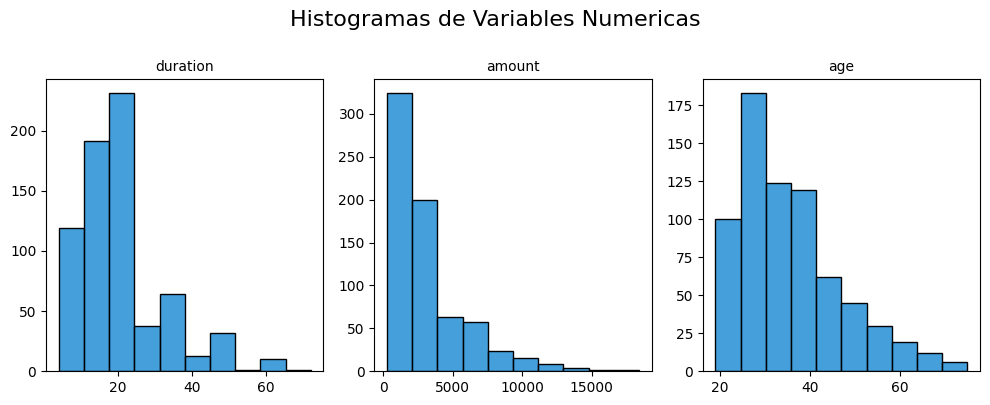

In [ ]:
#
# Histogramas de variables numericas
#
print_hist(Xtrain, num_var)

In [ ]:
#
# Las variables numericas tienen sesgo positivo. Antes de aplicar una normalizacion
# observemos si tiene outliers
#

In [ ]:
def print_box(data, columns):
  blue = ["#067FD0"]
  sns.set_palette(blue)
  fig, axes = plt.subplots(figsize=(10,2))
  fig.suptitle("Box Plots de Variables Numericas", fontsize=16, y=1)
  col_cnt = 1
  skew_cols = []
  title_color = 'black'
  for colname in columns:
    ax = plt.subplot(1,3, col_cnt)
    ax.set_title(colname , color=title_color, size=10)
    bp = sns.boxplot(x=Xtrain[colname])
    bp.set(xlabel=None, ylabel=None)
    col_cnt += 1
  plt.tight_layout()
  plt.show()

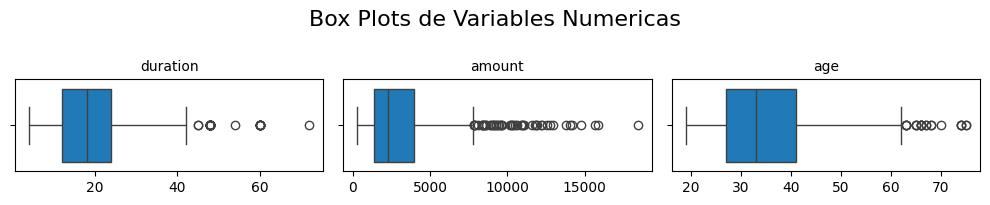

In [ ]:
#
# Diagrama de caja y bigotes
#
print_box(Xtrain, num_var)

In [ ]:
#
# Las variables numericas cuentan con valores extremos
# Continuamos el analisis para identificarlos

In [ ]:
# Retorna un dataframe con los outliers basado en las columnas de entrada
def outliers_by_columns(data, cols):
  outliers_df = pd.DataFrame()
  for col in cols:
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    print("Columna: " + col)
    print("IQR: %s" % (IQR))
    print("Q1: " + str(Q1))
    print("Q3: " + str(Q3))
    lower_range = Q1 - 1.5 * IQR if Q1 - 1.5 * IQR > 0 else 0
    upper_range = Q3 + 1.5 * IQR
    outliers = data[(data[col] > upper_range) | (data[col] < lower_range)]
    print("Lower range: " + str(lower_range))
    print("Upper range: " + str(upper_range))
    print("Numero of Outliers: " + str(len(outliers)))
    print()
    outliers_df = outliers_df.append(pd.DataFrame(data[(data[col] > upper_range) | (data[col] < lower_range)]))
  return outliers_df

In [ ]:
#
# Calculamos Q1, Q3, el rango interquartil y el numero de outliers de cada
# variable
#
out_df = outliers_by_columns(Xtrain, num_var)

Columna: duration
IQR: 12.0
Q1: 12.0
Q3: 24.0
Lower range: 0
Upper range: 42.0
Numero of Outliers: 44

Columna: amount
IQR: 2585.5
Q1: 1335.5
Q3: 3921.0
Lower range: 0
Upper range: 7799.25
Numero of Outliers: 50

Columna: age
IQR: 14.0
Q1: 27.0
Q3: 41.0
Lower range: 6.0
Upper range: 62.0
Numero of Outliers: 22



In [ ]:
#
# Numero totals de registros con outliers
#
print("Numero total de files con outliers en la data de entrenamiento: " + str(len(out_df.index)))
#
# Nos encargaremos de los outliers mediante una transformacion logarithmica
# mas adelante

Numero total de files con outliers en la data de entrenamiento: 116


<Axes: >

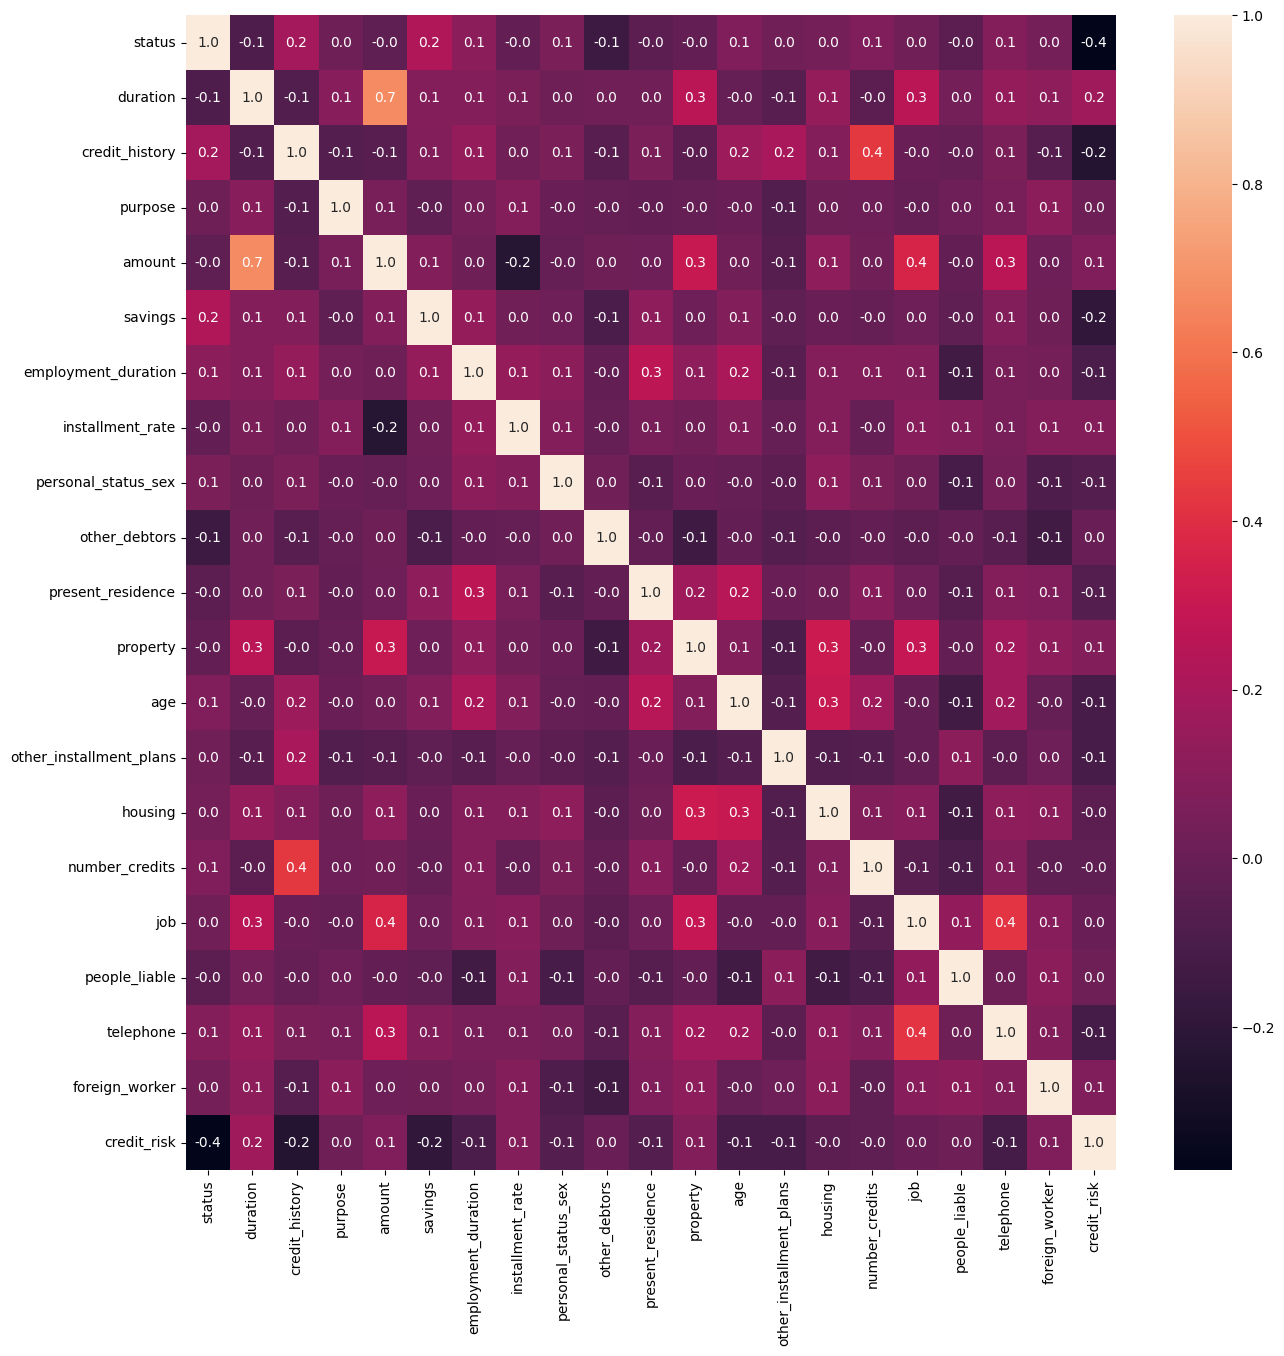

In [ ]:
# Analizamos correlacion de las variables de entrada y salida
Training = pd.merge(Xtrain, ytrain, left_index=True, right_index=True)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(round(Training.corr(),2), annot = True, fmt=".1f", ax=ax)

In [ ]:
# La unica correlacion fuerte es entre duration y amount lo  cual tiene bastante sentido

In [ ]:
#
# Coeficientes de correlacion de las variables con respector a la variable de
# salida
#
corr_matrix = Training.corr()
corr_matrix["credit_risk"].sort_values(ascending=False)

credit_risk                1.000000
duration                   0.168746
installment_rate           0.086161
property                   0.079671
amount                     0.069336
foreign_worker             0.068202
people_liable              0.010718
purpose                    0.009314
other_debtors              0.003228
job                        0.000940
number_credits            -0.028447
housing                   -0.043539
present_residence         -0.070117
personal_status_sex       -0.072645
employment_duration       -0.096988
age                       -0.105526
other_installment_plans   -0.107583
telephone                 -0.119066
savings                   -0.190465
credit_history            -0.244185
status                    -0.366125
Name: credit_risk, dtype: float64

In [ ]:
#
# Analisis de variables categoricas
#

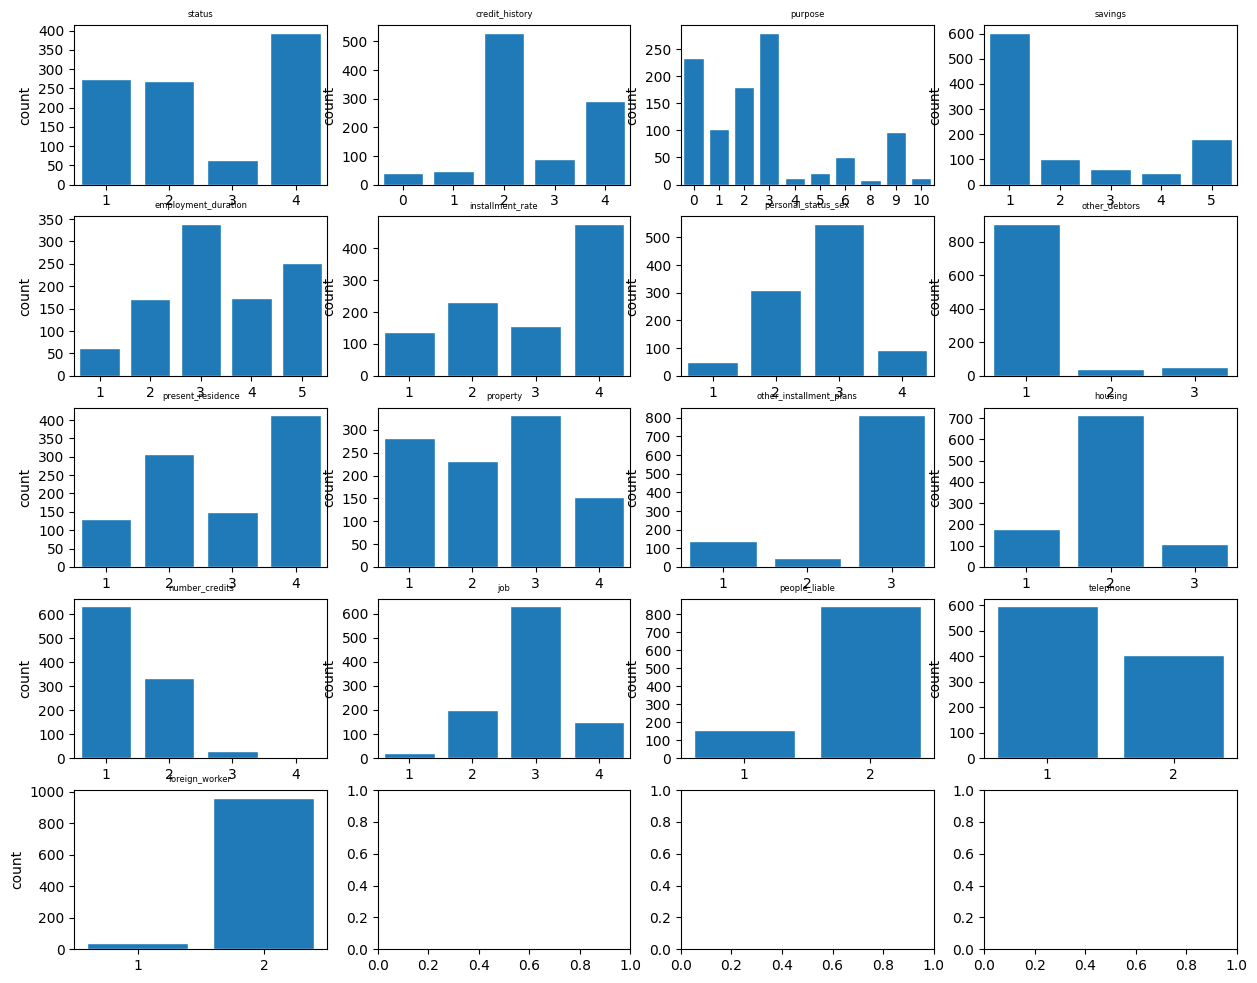

In [ ]:
fig, axes = plt.subplots(5,4, figsize=(15,12))
sns.set(font_scale=0.5)
axes = axes.ravel()
for col, ax in zip(df[cat_var], axes):
  sns.countplot(x=df[col], ax=ax)
  ax.set(title=f'{col}', xlabel=None)


### **Describe y explica a continuación las transformaciones que has decidido aplicar a cada columna:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


*   **Variables Numericas** : ('duration', 'amount', 'age) le aplicare un escalamiento utilizando la function MixMaxScaler() para asegurarnos que todas las variables numericas contribuyan igualmente al modelo, seguida por transformacion logaritmica para normalizar la distribucion debido al sesgo positivo y para minimizar el impactor de los valores extremos.


*   **Variables Categoricas Nominales**: Aunque las variables categoricas ya estan de cierta forma codificados como enteros para evitar que aquellas con rangos mas altos afecten el modelo decidi aplicar la transformacion OneHotEncoding()

  Las siguientes son las variables categoricas nominales: 'purpose',  'personal_status_sex', 'other_debtors', 'other_installment_plans'


### ++++++++ Termina la sección de agregar texto. +++++++++++


# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

## **Ejercicio 6**

In [ ]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# ************* Inlcuye aquí tu código:*****************************


# Variables numéricas:
# num_var = ['duration', 'amount', 'age']
num_pipe = make_pipeline( MinMaxScaler(), FunctionTransformer(np.log1p))
num_pipe_nombres = num_var



# Variables categóricas:
# Aplicaremos transformacion OneHotEncoder a las variables nominales
# Considero que las variables ordinales al estar codificadas del 1 al 3, 1 al 4,
# 1 al 5 y de 0 al 5 no necesitan ninguna transformacion o normalizacion
cat_pipe = make_pipeline(OneHotEncoder())
cat_pipe_nombres = ['purpose',  'personal_status_sex', 'other_debtors', 'other_installment_plans']


# Conjuntemos las transformaciones de todo tipo de variable y en dado caso
# deja inaletardas aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer(transformers=[('numeric-pipe' , num_pipe, num_pipe_nombres), ('cat-pipe',cat_pipe, cat_pipe_nombres)], remainder='passthrough')

# *********** Aquí termina la sección de agregar código *************


## **Ejercicio 7**

In [ ]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo aumentado que llamaremos trainval para utilizar como entrenamiento:

# ************* Inlcuye aquí tu código:**************************

Xtrainval = pd.concat([Xtrain, Xval])
ytrainval = pd.concat([ytrain, yval])

# *********** Aquí termina la sección de agregar código *************


print(Xtrainval.shape, ytrainval.shape)

(850, 20) (850, 1)


## **Ejercicio 8**

In [ ]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.

def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja. En dado caso una decisión
  # puede ser que un modelo tenga simplemente los valores de sus
  # hiperparámetros con los predeterminados.
  # Consulta en dado caso la documentación de cada modelo para
  # la identificación de los hiperparámetros que desees ajustar.


  # Regresión Logística:
  modelos.append(LogisticRegression(class_weight={0:0.20, 1:0.8}, random_state=1))
  nombres.append('LR')

  # k-Vecinos más Cercanos:
  modelos.append(KNeighborsClassifier(n_neighbors=9))
  nombres.append('kNN')

  # Árbol de decisiones:
  modelos.append(DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=18, min_samples_split=2, random_state=1))
  nombres.append('DTree')

  # Bosque Aleatorio:
  modelos.append(RandomForestClassifier(n_estimators=10, min_samples_leaf=18, min_samples_split=2, random_state=1))
  nombres.append('RF')

  # XGBoosting:
  modelos.append(XGBClassifier(n_estimators=5,  max_depth=3, learning_rate=0.3,  random_state=1))
  nombres.append('XGBoost')

  # Red neuronal de Perceptrón Multicapa:
  modelos.append(MLPClassifier(activation="tanh", random_state=1))
  nombres.append('MLP')

  # # # Máquina de Vectores de Soporte:
  modelos.append(SVC(kernel="poly", random_state=1))
  nombres.append('SVM')

  # *********** Aquí termina la sección de agregar código *************

  return modelos, nombres


# Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrain,
                          ytrain,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))




>> LR
	 test_precision 0.439 (0.020)
	 train_precision 0.465 (0.009)
	 test_roc_auc 0.778 (0.030)
	 train_roc_auc 0.825 (0.007)
	 test_f1 0.568 (0.021)
	 train_f1 0.601 (0.009)
	 test_accuracy 0.631 (0.024)
	 train_accuracy 0.662 (0.010)
	 test_recall 0.806 (0.041)
	 train_recall 0.851 (0.012)
>> kNN
	 test_precision 0.574 (0.062)
	 train_precision 0.679 (0.023)
	 test_roc_auc 0.739 (0.043)
	 train_roc_auc 0.835 (0.014)
	 test_f1 0.505 (0.051)
	 train_f1 0.602 (0.036)
	 test_accuracy 0.734 (0.028)
	 train_accuracy 0.786 (0.014)
	 test_recall 0.452 (0.052)
	 train_recall 0.542 (0.050)
>> DTree
	 test_precision 0.542 (0.084)
	 train_precision 0.706 (0.026)
	 test_roc_auc 0.711 (0.036)
	 train_roc_auc 0.856 (0.010)
	 test_f1 0.450 (0.073)
	 train_f1 0.613 (0.034)
	 test_accuracy 0.717 (0.033)
	 train_accuracy 0.795 (0.011)
	 test_recall 0.390 (0.081)
	 train_recall 0.545 (0.058)
>> RF
	 test_precision 0.625 (0.139)
	 train_precision 0.798 (0.034)
	 test_roc_auc 0.760 (0.027)
	 train_roc_a

## **Ejercicio 9**

### **De acuerdo a la información de la matriz de costo dada en la documentación del problema, contesta las siguientes preguntas:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

a.   ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.


Según la matriz de costos, los falsos negativos representan los escenarios más costosos para el banco. Estos ocurren cuando se identifica erróneamente a un cliente de riesgo como solvente y se le otorga un crédito que eventualmente no pagará, lo que resultaría en pérdidas significativas para la institución financiera. Este tipo de error tiene un costo relativo de 5 en comparación con los falsos positivos.

Por otro lado, los falsos positivos, donde se cataloga incorrectamente a un cliente solvente como riesgoso y se le niega el crédito que habría pagado adecuadamente, también tienen implicaciones negativas para el banco. Aunque menos costosos que los falsos negativos, ya que representan una oportunidad de negocio perdida, su costo relativo es de 1 en la matriz de costos.

b.   ¿Cuál o cuál serían entonces las métricas a considerar como más importantes? Justifica tu respuesta.

Considero que el Recall es la metrica mas importante en este escenario ya que  buscamos minimizar la cantidad de falsos negativos, es decir, queremos maximizar la cantidad de clientes de riesgo que son correctamente identificados como tales. Un Recall alto significa que el modelo está siendo efectivo en identificar a los clientes de riesgo, lo que reduce el riesgo de otorgar créditos a clientes que probablemente no pagarán, minimizando así las pérdidas financieras para el banco.


c.   Investiga qué otras métricas se pudieran considerar, de la gran familia de métricas que existen.

* Exactitud (Accuracy) : En este caso y sumando al desbalanceo de las clases, la Exactitud puede ser engañosa ya que esta puede ser alta a la vez que cataloga
erroneamente a los clientes riesgozos. Esta metrica debe considerase en el contexto del Recall.

* Precisión: Esta metrica no es suficiente en el contexto del problema del banco ya que esta busca minimizar los falsos positivos cuando lo que buscamos es minimizar los falsos negativos.

* F1 Score: Esta metrica es importante ya que provee un balance entre la Presición y el Recall lo que significa que el modelo estária determinando correctamente tanto los clientes de riesgo como los no riesgosos y minimizando tanto los falsos positivos como los falsos negativos.

* ROC-AUC: Esta es una metrica importanta ya nos proporciona una medida agregada del rendimiento del modelo todos los umbrales de clasificación posibles [1]. Un ROC AUC más alto indica que el modelo está mejor discriminando entre clientes buenos y malos, lo que es importante a la hora de minimizar  los falsos positivos y  los falsos negativos lo que disminuiria el riesgo y aumentaria los negocios de la institucion.

[1] *Classification: ROC Curve and AUC.* (s. f.). Google For Developers. https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 10**

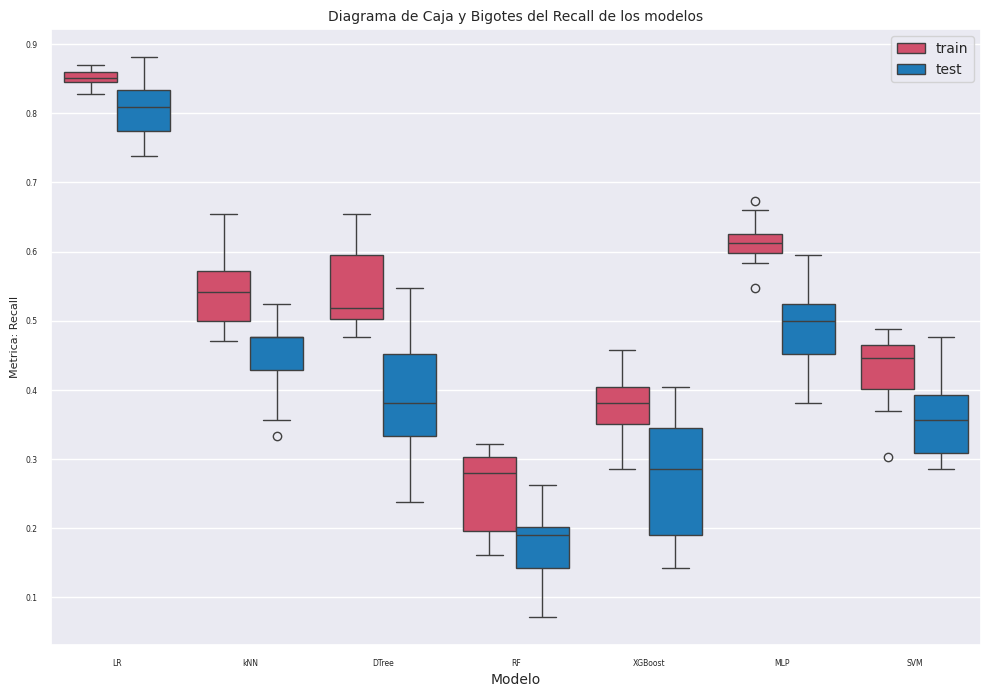

In [ ]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# utilizando los resultados obtenidos con la métrica que consideraste más importante
# en el ejercicio anterior:


# ************* Inlcuye aquí tu código:**************************

metrica = "recall"
mydf = pd.DataFrame(columns=['Modelo', 'Resultado', 'Conjunto'])
cnt = 0
for model in nombres:

  for tipo in ('train', 'test'):
    argumento = tipo + "_" + metrica
    for resultado in resultados[cnt][argumento]:
      mydf.loc[len(mydf.index)] = [model, resultado, tipo]
  cnt = cnt + 1

colors = ["#E63B60", "#067FD0"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(12, 8))
plt.title('Diagrama de Caja y Bigotes del Recall de los modelos', fontsize=10)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
sns.boxplot(x='Modelo', y='Resultado', hue='Conjunto', data=mydf)
plt.xlabel('Modelo', fontsize=10)
plt.ylabel('Metrica: Recall', fontsize=8)
plt.legend(fontsize=10)
plt.show()

# *********** Aquí termina la sección de agregar código *************


# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

In [ ]:
# Selecciona una técnica de sobremuestreo, submuestreo o sobremuestreo+submuestreo para
# clases no balanceadas que consideres adecuada, en combinación con los tres mejores modelos
# de la Parte II, para entrenar y desplegar todas las métricas que se desplegaron en la Parte II.
#
# Respuesta:
# ---------
#
# Seleccion de los tres mejores modelos:
# -------------------------------------
# Considero que hasta este momemto los modelos de Regresion Logaritmica (LR), Vecinos Mas
# Cercanos (KNN) y el arbol de decisiones nos da el mejor desempeño desde el punto de vista
# de la metrica Recall
#
# Seleccion de Tecnica: Sobremuestreo, Submuestreo o Sobremuestros+Submuestreo:
# ----------------------------------------------------------------------------
#
# Utilizare la combinacion de sobre y submuestreo a traves de la tecnica SMOTE-Tomek
# ************* Inlcuye aquí tu código:**************************

#
# Reducimos el numero de modelos a los tres seleccionados
#
def mis_modelos():
  modelos, nombres = list(), list()

  # Regresión Logística:
  # NOTA: Elimino el uso de class_weights ya que mas adelante utilizare el
  # metodo SMOTE-Tomek para gestionar el desbalanceo de clases
  modelos.append(LogisticRegression(random_state=1))
  nombres.append('LR')

  # k-Vecinos más Cercanos:
  modelos.append(KNeighborsClassifier(n_neighbors=9))
  nombres.append('kNN')

  # Árbol de decisiones:
  modelos.append(DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=18, min_samples_split=2, random_state=1))
  nombres.append('DTree')


  return modelos, nombres

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  #
  # Introducimos la tecnical Smote-Tomek en el pipeline
  #
  pipeline = Pipeline(steps=[('ct',columnasTransformer), ('smote-tomek', SMOTETomek()), ('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))



# *********** Aquí termina la sección de agregar código *************

>> LR
	 test_f1 0.588 (0.049)
	 train_f1 0.630 (0.012)
	 test_precision 0.516 (0.041)
	 train_precision 0.550 (0.011)
	 test_roc_auc 0.775 (0.037)
	 train_roc_auc 0.816 (0.009)
	 test_accuracy 0.713 (0.032)
	 train_accuracy 0.740 (0.009)
	 test_recall 0.686 (0.073)
	 train_recall 0.737 (0.017)
>> kNN
	 test_f1 0.551 (0.040)
	 train_f1 0.657 (0.014)
	 test_precision 0.446 (0.027)
	 train_precision 0.536 (0.016)
	 test_roc_auc 0.728 (0.040)
	 train_roc_auc 0.866 (0.010)
	 test_accuracy 0.648 (0.027)
	 train_accuracy 0.734 (0.015)
	 test_recall 0.722 (0.075)
	 train_recall 0.851 (0.021)
>> DTree
	 test_f1 0.482 (0.054)
	 train_f1 0.626 (0.020)
	 test_precision 0.481 (0.059)
	 train_precision 0.637 (0.027)
	 test_roc_auc 0.693 (0.026)
	 train_roc_auc 0.839 (0.006)
	 test_accuracy 0.685 (0.035)
	 train_accuracy 0.779 (0.011)
	 test_recall 0.492 (0.081)
	 train_recall 0.617 (0.043)


# **Parte IV: Mejor modelo**

## **Ejercicio 12**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

El modelo de Vecinos Mas Cercanos (KNN) es el mejor desde el punto de vista del recall, ya que tiene el mayor valor tanto en el conjunto de test como en el conjunto de entrenamiento. Aunque los modelos de regresionl logaritmica (RL) y arboles de decisiones (DT) tienen un mejor rendimiento  en términos de precisión, accuracy, F1-score y ROC AUC basado en las necesidades de la institucion bancaria , que es minimizar los falsos negativos, es el modelo de regresion logistica el que mas se ajusta a estas necesidades


### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 13**

In [ ]:
# Con dicho mejor modelo y utilizando la técnica de validación cruzada, busca
# los mejores hiperparámetros de dicho modelo y despliega todas las métricas que
# se han estado desplegando. Verifica que tu modelo no esté sobreentrenado e indica
# cuáles son los mejores valores obtenidos de los hiperparámetros.

# ************* Inlcuye aquí tu código:**************************

modelo = KNeighborsClassifier()
resultados = list()

params = {
    'm__n_neighbors': [3, 5, 7, 9, 11, 13],
    'm__leaf_size': [30, 40 , 50],
    'm__weights': ['uniform', 'distance'],
    'm__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

#
# Introducimos la tecnical Smote-Tomek en el pipeline
#
pipeline = Pipeline(steps=[('ct',columnasTransformer), ('smote-tomek', SMOTETomek()), ('m',modelo)])


# Aplicaremos validación-cruzada:
micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
grid = GridSearchCV(estimator=pipeline, param_grid=params, cv=micv, scoring='f1', return_train_score=True, verbose=1)
grid.fit(Xtrainval, ytrainval)

# Mejores Hiperparamtreos
best_params = grid.best_params_
print("Mejores hiperparámetros: " + str(best_params))

# Desplegar todas las métricas para el mejor modelo encontrado
# Definimos las métricas que queremos recuperar:
mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

# Llevamos a cabo el entrenamiento:
scores = cross_validate(pipeline,
                        Xtrainval,
                        ytrainval,
                        scoring=mismetricas,
                        cv=micv,
                        return_train_score=True,
                        )
yhat = grid.best_estimator_.predict(Xtrainval)  # Cambia Xtrainval por tu conjunto de test si es necesario
print()
print("Metricas de Desempeño:")
print(f"Accuracy: {round(accuracy_score(ytrainval, yhat), 2)}")
print(f"Precision: {round(precision_score(ytrainval, yhat), 2)}")
print(f"Recall: {round(recall_score(ytrainval, yhat), 2)}")
print(f"F1 Score: {round(f1_score(ytrainval, yhat), 2)}")
print(f"ROC AUC Score: {round(roc_auc_score(ytrainval, yhat), 2)}")

# *********** Aquí termina la sección de agregar código *************


Fitting 15 folds for each of 144 candidates, totalling 2160 fits
Mejores hiperparámetros: {'m__algorithm': 'ball_tree', 'm__leaf_size': 30, 'm__n_neighbors': 11, 'm__weights': 'uniform'}

Metricas de Desempeño:
Accuracy: 0.73
Precision: 0.53
Recall: 0.83
F1 Score: 0.65
ROC AUC Score: 0.76


## **Ejercicio 14**

In [ ]:
# 14.	Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# utiliza ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Obtener los valores de todas las métricas que se han estado desplegando.


# ************* Inlcuye aquí tu código:**************************

modelo = KNeighborsClassifier(n_neighbors = 11, leaf_size = 30, algorithm = 'ball_tree', weights = 'uniform' )
pipeline = Pipeline(steps=[('ct',columnasTransformer), ('smote-tomek', SMOTETomek()), ('m',  modelo)])
pipeline.fit(Xtrainval, ytrainval)
yhat = pipeline.predict(Xtest)
yhat_prob = pipeline.predict_proba(Xtest) [:1]
print("Metricas de Desempeño:")
print(f"Accuracy: {round(accuracy_score(ytest, yhat), 3)}")
print(f"Precision: {round(precision_score(ytest, yhat),3) }")
print(f"Recall: {round(recall_score(ytest, yhat), 3)}")
print(f"F1 Score: {round(f1_score(ytest, yhat), 3)}")
print(f"ROC AUC Score: {round(roc_auc_score(ytest, yhat), 3)}")

# *********** Aquí termina la sección de agregar código *************


Metricas de Desempeño:
Accuracy: 0.66
Precision: 0.463
Recall: 0.844
F1 Score: 0.598
ROC AUC Score: 0.713


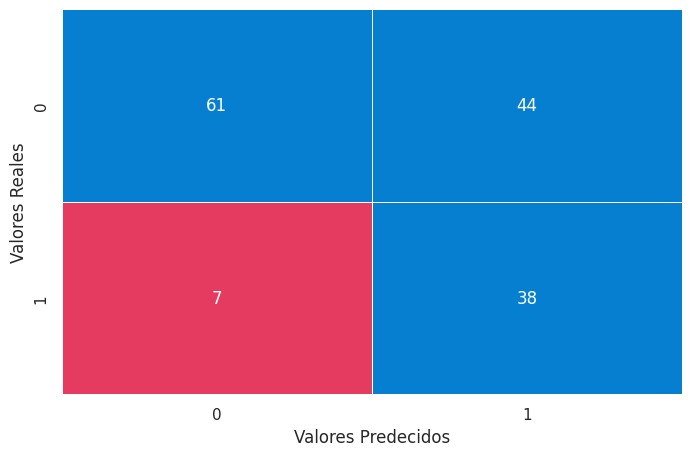

In [ ]:
# b.	Obtener la matriz de confusión.

# ************* Inlcuye aquí tu código:**************************
cm = confusion_matrix(ytest, yhat)
plt.figure(figsize=(8,5))
sns.set(font_scale=1.)
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap=colors, linewidth=.5)
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predecidos')
plt.show()

# *********** Aquí termina la sección de agregar código *************

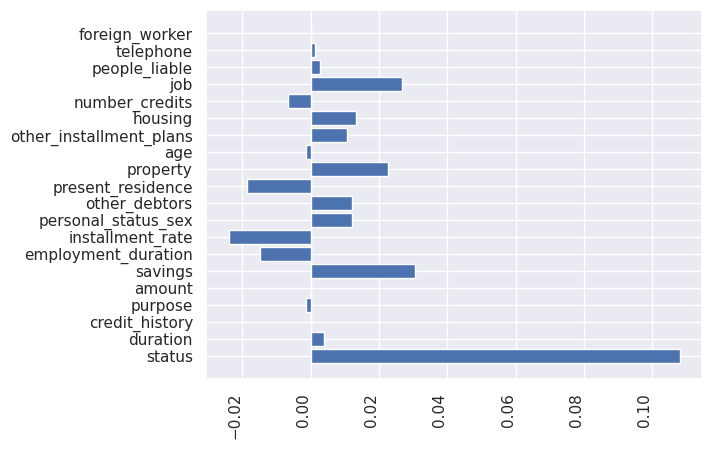

In [ ]:
# c.	Realiza un análisis de importancia de variables (feature importance) de este
# mejor modelo con el conjunto de prueba (test) e incluye tus conclusiones al respecto.

# ************* Inlcuye aquí tu código:**************************

resultados = permutation_importance(pipeline, Xtest, ytest)
importance = resultados.importances_mean

fc_df2 = pd.DataFrame(columns=['Feature', 'Coeficient'])


for i,v in enumerate(importance):
  fc_df2.loc[len(fc_df2.index)] = [ pipeline.feature_names_in_[i], v]

fig, ax = plt.subplots()
ax.barh(fc_df2['Feature'],fc_df2['Coeficient'])
plt.xticks(rotation=90, ha='right')
plt.show()

# *********** Aquí termina la sección de agregar código *************
#
# Conclusiones
# ------------
# Basado en la grafica de barras del analisis de importancia para el modelo
# de vecinos mas cercanos (KNN) es evidente que la variable "status" que denota
# si el cliente tiene cuenta corriente (de cheques) en la institucion y su
# saldo como el factor mas determinante para predecir si se le debe otorgar
# el credito al cliente.
#
# Los segundos factores en orden de importancia son la variable "savings", "property"
# y "job" que definen si el cliente tiene cuenta de ahorros y la cantidad de dinero
# en esta, las propiedades que posee y si tiene trabajo o no y a que nivel.
#
# Por ultimo, observamos que el modelo considera cuatro variables de con un poco menos de
# relevancia como lo son "other_installments", "other_debtors" , "housing"  y
# "personal_status_sex" que tambien pueden influir en prediccion del modelo.
#
# Cabe observar que la variable status tiene una importancia 4 veces major que
# las variables que le siguen mas de cerca. Este factor por si solo puede ser clave
# en la desicion del modelo. Esto tiene sentido , ya que una cuenta corriente
# es un indicador de liquidez y flujo de caja del cliente.
#
# Por otro lado, la consideracion de la variable personal_status_sex, la que provee
# cierta informacion sobre el sexo y el estado civil del cliente, es algo que
# considero interesante particularmente porque come esta definida esta variable
# es imposible determinar si el cliente es mujer a menos que ella sea soltera o
# si es hombre a menos que sea casado, divorciado o viudo


## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad. En particular puedes comparar tus resultados con los que se muestran en el artículo de la IEEE.**   

### ++++++++ Inicia la sección de agregar texto: +++++++++++
**Concluciones Finales:**

Encontre muy interesante el hecho de que exista una gran cantidad de modelos de aprendizaje automatico y el que cada uno cuente con un numero de hiperparametros que pueden tomar rango de valores desde 2 hasta cientos. Esto nos plantea un problema donde el numero de combinaciones posibles puede crecer muy rapidamente dificultando nuestra capacidad de converger en el modelo y los hyperparamtetros optimos para resolver el problema en cuestion

Si bien existen herramientas como GridSearchVC() las cuales facilitan esta convergencia hacia el mejor modelo y los mejores hiperparametros, considero que existe la oportunidad de crear modelos mas inteligentes que tomen estas decisiones basadas en los datos de entrada y de salida del conjunto de entrenamiento.

Por otra lado, en terminos de la conclucion a la que llegue luego de analysar los resultados del modelo seleccionado, KNNClassifier(), y sus hiperparamtros y al comparar mis resultados a los obtenidos en el articulo IEEE expongo lo siguiente:

Durante la entonacion de los hiperparametros del modelo KNNClassifier() encontre que si bien las metricas como accuracy, recall, presicion, f1-score y auc_roc no experimentaban muy baja variacion, el analisis de las variables mas importantes si sufria variaciones importantes con excepcion de la variable "status" la cual se mantuvo al tope y por encima de 0.10. Desde mi punto de vista, esto demuestra que la variable es el factor mas importante desde el punto de vista predictivo y que por si sola , esta contiene una gran cantidad de informacion respecto a la habilidad del cliente de pagar sus deudas

En el articulo de IEEE , el autor evalua varios modelos de aprendizaje automatico asi como diferentes tecnicas de manejo de desbalanceo de clases.  La combinacion de los diferentes modelos y tecnicas resultan en una amplia matriz de metricas de desempeno. Entre estas podemos observar que el valor mas alto de Recall obtenido por al autor fue del 86% utilizando el modelo de gradiente descendiente en conjuncion con la tecnica de balanceo SMOTE-tomek()

En nuestro caso, utilizando la misma tecnica de balanceo de clases pero a travez del modelo KNNClassifier() puede obtener un Recall del 84.4% , no muy alejado de el obtenido por el autor del articulo. Por otro lado, mi enfoque fue, aunque sin obviar otra metricas,  en maximizar la metrica Recall. Por esto el desempeño de mi modelo desde el punto de vista del Accuracy, Prescion, F1-Score y AUC_ROC fue mas bajo




### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ###**Fin de la Actividad de las Semanas 5 y 6.**